<a href="https://colab.research.google.com/github/tiennvcs/EE6363_AdvancedML/blob/main/HW1/P3/Task_3_LS_GD_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider least square problem $\min_{x \in \mathbf{R}^3}||y - Ax||_2^2$, where $A = \begin{bmatrix}
  3 & 1 & 2 \\
  1 & 3 & 1 \\
  2 & 1 & 3 \\
\end{bmatrix}
$, and $y = \begin{bmatrix}
  2 \\
  3 \\
  4 \\
\end{bmatrix}$

## Solve by Gradient descent

### Test gradient descent with fixed stepsize

Gradient descent algorithm procedure with constant stepsize $\gamma$:


1.   Initialize $x_0 \in \mathbf{R}^3$ (e.g., randomly)

2.   Start with $n = 1$, then loop until convergence, or reach the limitation iteration $l$, at every timestep $n$ do the following instruction:
    - Calculate the gradient at $x_{n-1}$
    $$
        g(x_{n-1}) = 2(A^TAx_{n-1} - A^Ty)
    $$
    - Perform update $x_n$
    $$
        x_n = x_{n-1} - \gamma g(x)
    $$
3. Return $x_n$




In [1]:
import numpy as np
from numpy.linalg import inv, svd, norm
from typing import Union
from matplotlib import pyplot as plt

In [2]:
# Define f(x) function
def f(A: np.ndarray, x: np.array, y: np.array):
    return norm(y-A.dot(x))**2

In [3]:
def gd_constant_step(A: np.ndarray, y: np.ndarray, x0=[0, 0, 0], epoch=300, gamma0=1e-2) -> np.ndarray:
    x = x0
    f_values = []
    for i in range(1, epoch+1):
        g = 2*((A.T).dot(A).dot(x) - (A.T).dot(y))
        x = x - gamma0*g
        f_values.append(f(A, x, y))
    return x, f_values

In [4]:
# Test on A, y
A = np.array([
    [3, 1, 2],
    [1, 3, 1],
    [2, 1, 3],
])

y = np.array([2, 3, 4]).T

In [5]:
x0 = np.zeros(shape=3)
epoch = 300
gamma0 = 1e-2

In [6]:
x_fixed, f_values_fixed = gd_constant_step(A, y, x0=x0, epoch=epoch, gamma0=gamma0)

In [7]:
print("Solution founded by gradient descent (constant step size) is: {}".format(x_fixed))

Solution founded by gradient descent (constant step size) is: [-0.53612903  0.69230769  1.45920596]


In [8]:
print("The minimum value founded by fixed step size GD algorithm: {}".format(f(A, x_fixed, y)))

The minimum value founded by fixed step size GD algorithm: 1.088116538205186e-05


### Gradient descent algorithm procedure with adaptive stepsize $\gamma$




1.  Initialize $x_0 \in \mathbf{R}^3$ (e.g., randomly)

    Initialize $\gamma_0$ (e.g., 0.02)

2.   Start with $n = 1$, then loop until convergence, or reach the limitation iteration $l$, at every timestep $n$ do the following instruction:
    - Calculate the gradient at $x_{n-1}$
    $$
        g(x_{n-1}) = 2(A^TAx_{n-1} - A^Ty)
    $$
    - Find the step size that minimizes the metric at the next GD update
    $$
        \gamma_n = \frac{||g(x_{n-1})||^2_{}}{||Ag(x_{n-1})||^2}
    $$
    - Perform update $x_n$
    $$
        x_n = x_{n-1} - \gamma_n g(x)
    $$
3. Return $x_n$

In [9]:
def gd_adaptive_step(A: np.ndarray, y: np.ndarray, x0=[0, 0, 0], epoch=300, gamma0=1e-8) -> np.ndarray:
    x = x0
    gamma = gamma0
    f_values = []
    for i in range(1, epoch+1):
        g = 2*((A.T).dot(A).dot(x) - (A.T).dot(y))
        gamma = (g.T.dot(g))/(((A.dot(g)).T).dot((A.dot(g))))
        x = x - gamma*g
        f_values.append(f(A, x, y))
    return x, f_values

In [10]:
x_adaptive, f_values_adaptive = gd_adaptive_step(A, y, x0=x0, epoch=epoch, gamma0=gamma0)

In [11]:
print("Solution founded by gradient descent (adaptive step size) is: {}".format(x_adaptive))

Solution founded by gradient descent (adaptive step size) is: [-1.12842218  0.26042652  0.87157781]


In [12]:
print("The minimum value founded by adaptive step size GD algorithm: {}".format(f(A, x_adaptive, y)))

The minimum value founded by adaptive step size GD algorithm: 29.000000000000227


### Plot value of metric f(x) with both algorithms

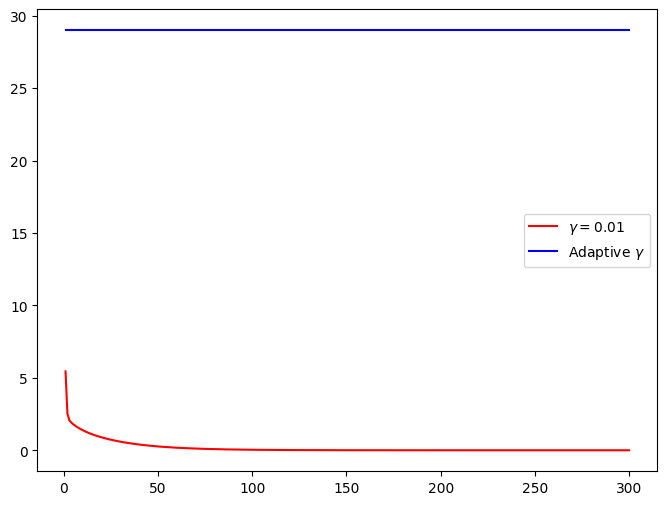

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
X = range(1, epoch+1)
ax.plot(X, f_values_fixed, label=r"$\gamma = 0.01$", color='r')
ax.plot(X, f_values_adaptive, label=r"Adaptive $\gamma$", color='b')
ax.legend(loc='best')
plt.show()

- How do the two curves compare?

    $→$ Two red one converge better than the blue one. The blue one do not change value.

- What is the metric value upon convergence?

    $\rightarrow$ The adaptive GD:= 29, Fixed GD: $≈0$

- What is $x$ at the last update for $(a)$ and $(b)$ and how does it compare
with the single-shot solution of Part 2?

    $\rightarrow$ The lastest update founded by fixed GD: $[-0.53612903  0.69230769  1.45920596]^T$ is similar with single-shot solution founded by inversion method.

    $\rightarrow$ The lastest update founded by adaptive GD: $[-1.12842218  0.26042652  0.87157781]^T$ is different with solution founded by inversion method.

